# Example on how to use the code

In [1]:
from JC import *
import matplotlib.pyplot as plt

## System

A qubit (here a [transmon](https://arxiv.org/abs/cond-mat/0703002)) with frequency $\omega_q$ (`omega_q`) and anharmonicity $\eta > 0$ (`eta`) is coupled to a readout resonator of frequency $\omega_r$ (`omega_r`) with coupling strength $g$ (`g`).
For a detailed discussion of the system, parameters and meaning of jargons used here see [Phys. Rev. A **94**, 012347 (2016)](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.94.012347) and [Phys. Rev. Lett. **117**, 190503 (2016)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.117.190503).

---

### Get tranmon energies and couplings perturbatively

Use a perturbative model of transmon (transmon as a slightly anharmonic oscillator) to get energy levels and charge matrix elements for `tmax` number of levels. `qubit_energy_list[q]` is the tranmon energy for the level q and `g_list[q]` is the tranmon charge matrix element between levels q+1 and q ($g_{q+1,q}$).

In [2]:
tmax = 8; omega_q = 5; eta = 0.25; g = 0.1 #Units assumed in GHz here
qubit_energy_list, g_list = transmon_perturbative(tmax, omega_q, eta, g)

### Get eigenenergies and eigenvectors of the JC ladder

Diagonalize the JC ladder with up to `nmax` number of photons. Only RWA interactions are considered here. Diagonalization will give the eigenenergies of the system $\overline{E}_{n,q}$ and eigenvectors $\overline{\lvert n, q \rangle}$, for when the resonator is in the state $n$ and the qubit is in the state $q$.

The output is labeled as follows: $\overline{E}_{n,q}=$ `eigen_energies[n+q, q]` and $\overline{\lvert n, q \rangle}=$ `eigen_vectors[n+q, q]`.

In [3]:
nmax = 100; omega_r = 6;
eigen_energies, eigen_vectors = diagonalize_ladder(nmax, omega_r, qubit_energy_list, g_list)

## Use eigenenergies to calculate interesting quantities

### Calculate "fan diagram" of the system

Fan diagram is defined as $\overline{\omega}_q(n)\equiv \overline{E}_{n-q,q} - n\omega_r$. It essentially shows the energies in a single RWA strip.

Here $\overline{\omega}_q(n)=$ `fan[q][n]`

In [4]:
fan = get_fan_diagram(eigen_energies, omega_r)

### Calculate qubit transitions

Qubit transitions are defined as $\overline{\omega}_{q+1,q}(n)\equiv \overline{E}_{n,q+1} - \overline{E}_{n,q}$.

Here $\overline{\omega}_{q+1,q}(n)=$ `transitions[q][n]`

In [5]:
transitions = get_qubit_transitions(eigen_energies)

### Calculate resonator frequencies

Resonator frequency when qubit is in the state $q$ is defined as $\omega_r^{\lvert q \rangle}(n)\equiv \overline{E}_{n+1,q} - \overline{E}_{n,q}$.

Here $\omega_r^{\lvert q \rangle}(n)=$ `response[q][n]`

In [6]:
response = get_res_response(eigen_energies)

### Ploting

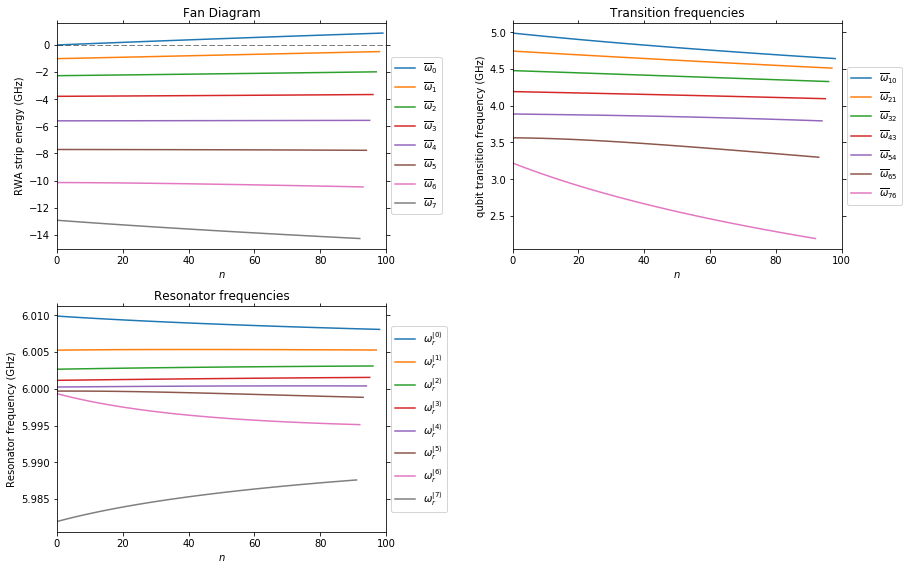

In [7]:
plt.clf();
fig = plt.figure(num=1)
fig.set_size_inches(12,8)

ax1 = plt.subplot(221)

for i in range(len(fan)):
    plt.plot(np.arange(len(fan[i])), fan[i], label=r"$\overline{{\omega}}_{0}$".format(i))
plt.plot(np.arange(nmax+1), np.zeros(nmax+1), 'k--', linewidth=0.5)

plt.xlim(0, nmax)
plt.xlabel(r"$n$"); plt.ylabel(r"RWA strip energy (GHz)")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Fan Diagram")
ax1.xaxis.set_ticks_position("both"); ax1.yaxis.set_ticks_position("both");

ax2 = plt.subplot(222)

for i in range(len(transitions)):
    plt.plot(np.arange(len(transitions[i])), transitions[i], label=r"$\overline{{\omega}}_{{{0}{1}}}$".format(i+1, i))

plt.xlim(0, nmax)
plt.xlabel(r"$n$"); plt.ylabel(r"qubit transition frequency (GHz)")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Transition frequencies")
ax2.xaxis.set_ticks_position("both"); ax2.yaxis.set_ticks_position("both");

ax3 = plt.subplot(223)

for i in range(len(response)):
    plt.plot(np.arange(len(response[i])), response[i], label=r"$\omega_r^{{|{0}\rangle}}$".format(i))

plt.xlim(0, nmax)
plt.xlabel(r"$n$"); plt.ylabel(r"Resonator frequency (GHz)")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Resonator frequencies")
ax3.xaxis.set_ticks_position("both"); ax3.yaxis.set_ticks_position("both");

plt.tight_layout(pad=1.0, w_pad=8.0, h_pad=1.0);
plt.show();

## For when $\omega_q > \omega_r$

In [8]:
tmax = 8; omega_q = 5; eta = 0.25; g = 0.1 #Units assumed in GHz here
qubit_energy_list, g_list = transmon_perturbative(tmax, omega_q, eta, g)

nmax = 100; omega_r = 4.5;
eigen_energies, eigen_vectors = diagonalize_ladder(nmax, omega_r, qubit_energy_list, g_list)

fan = get_fan_diagram(eigen_energies, omega_r)
transitions = get_qubit_transitions(eigen_energies)
response = get_res_response(eigen_energies)

### Plotting

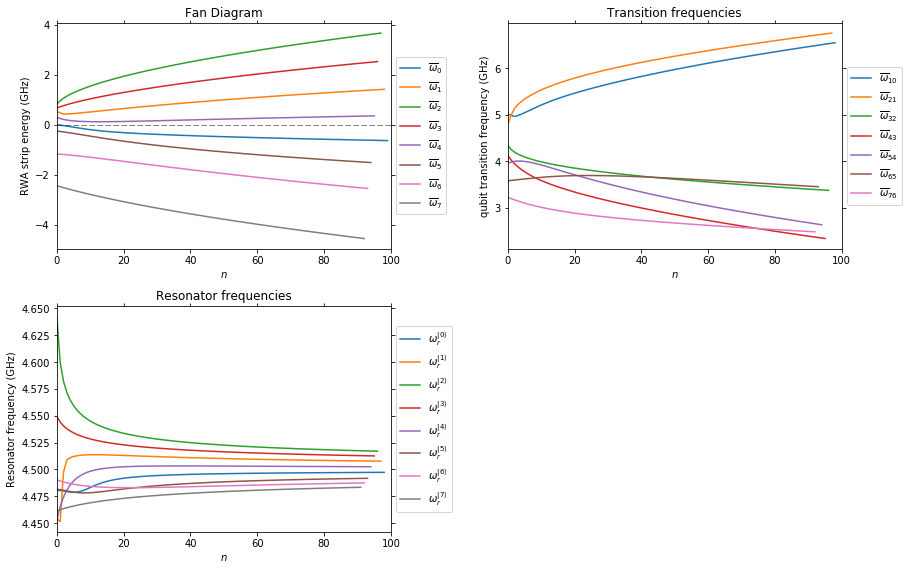

In [9]:
plt.clf();
fig = plt.figure(num=1)
fig.set_size_inches(12,8)

ax1 = plt.subplot(221)

for i in range(len(fan)):
    plt.plot(np.arange(len(fan[i])), fan[i], label=r"$\overline{{\omega}}_{0}$".format(i))
plt.plot(np.arange(nmax+1), np.zeros(nmax+1), 'k--', linewidth=0.5)

plt.xlim(0, nmax)
plt.xlabel(r"$n$"); plt.ylabel(r"RWA strip energy (GHz)")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Fan Diagram")
ax1.xaxis.set_ticks_position("both"); ax1.yaxis.set_ticks_position("both");

ax2 = plt.subplot(222)

for i in range(len(transitions)):
    plt.plot(np.arange(len(transitions[i])), transitions[i], label=r"$\overline{{\omega}}_{{{0}{1}}}$".format(i+1, i))

plt.xlim(0, nmax)
plt.xlabel(r"$n$"); plt.ylabel(r"qubit transition frequency (GHz)")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Transition frequencies")
ax2.xaxis.set_ticks_position("both"); ax2.yaxis.set_ticks_position("both");

ax3 = plt.subplot(223)

for i in range(len(response)):
    plt.plot(np.arange(len(response[i])), response[i], label=r"$\omega_r^{{|{0}\rangle}}$".format(i))

plt.xlim(0, nmax)
plt.xlabel(r"$n$"); plt.ylabel(r"Resonator frequency (GHz)")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Resonator frequencies")
ax3.xaxis.set_ticks_position("both"); ax3.yaxis.set_ticks_position("both");

plt.tight_layout(pad=1.0, w_pad=8.0, h_pad=1.0);
plt.show();

## Labeling problem for some parameter regimes

When the qubit is above the resonator ($\omega_q > \omega_r$), at some parameters the RWA strip energies cross each other. This will make the labelings wrong and one should look at the fan diagram to see what is happening to the labelings (see below.)

In [10]:
tmax = 8; omega_q = 5.4; eta = 0.25; g = 0.1 #Units assumed in GHz here
qubit_energy_list, g_list = transmon_perturbative(tmax, omega_q, eta, g)

nmax = 30; omega_r = 4.5;
eigen_energies, eigen_vectors = diagonalize_ladder(nmax, omega_r, qubit_energy_list, g_list)

fan = get_fan_diagram(eigen_energies, omega_r)

For example for these parameters, the RWA strip energy of $\overline{\omega}_0$ is crossing the energy of $\overline{\omega}_7$ at around 10 photons. This means after this crossing, the labels for levels `q=0` and `q=7` should be swapped (hereafter blue line will be for 7, and grey line will be for 0.)

**IMPORTANT**: This change of the labels is _not_ automatically done in this code, so one should take care when using the other functions such as `get_qubit_transitions()` and `get_res_response()`, as they may not be outputting what they are supposed to (for the system after the crossing.)

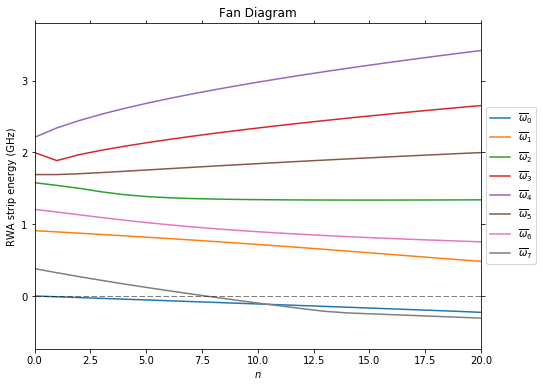

In [11]:
plt.clf();
fig = plt.figure(num=1)
fig.set_size_inches(8,6)

ax1 = plt.subplot(111)

for i in range(len(fan)):
    plt.plot(np.arange(len(fan[i])), fan[i], label=r"$\overline{{\omega}}_{0}$".format(i))
plt.plot(np.arange(nmax+1), np.zeros(nmax+1), 'k--', linewidth=0.5)

plt.xlim(0, 20)
plt.xlabel(r"$n$"); plt.ylabel(r"RWA strip energy (GHz)")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Fan Diagram")
ax1.xaxis.set_ticks_position("both"); ax1.yaxis.set_ticks_position("both");

plt.show()